In [1]:
from pathlib import Path
import os
import sys


In [2]:
__file__ = os.path.abspath('')

In [3]:
sys.path.insert(0, f'{Path(__file__).parents[0]}')

In [4]:
path_data = fr'{Path(__file__).parents[0]}\models\data'
# path_apikeys = r'C:\Users\HP\IdeaProjects\FinIgor\data\apikeys.csv'
path_apikeys = r'C:\Users\serge\OneDrive\reuters\apikeys.csv'
path_data

'C:\\Users\\serge\\IdeaProjects\\portfolio_manager\\portfolio_management\\models\\data'

In [5]:
from portfolios.equity import EquityPortfolio
from models.data.source import Eikon
from models.data.handler import DataHandler

In [6]:
eikon_api = Eikon(path_apikeys)
portfolio = EquityPortfolio(config_path=r'examples/config_example.yaml')

params = {
    'rics': portfolio.assets,
    'field': ['TR.PriceClose', 'Price Close'],
    'date_field': ['TR.PriceClose.calcdate', 'Calc Date'],
    'load_path': os.path.join(path_data, 'csv')
}


eikon_api = Eikon(path_apikeys)
data = eikon_api.load_timeseries(**params)

preprocessor = DataHandler(data=data,
                           date_col=params['date_field'][1])

returns = preprocessor.get_returns(period=15)

2023-08-28 13:18:44,622 P[26372] [MainThread 11112] Error: no proxy address identified.
Check if Eikon Desktop or Eikon API Proxy is running.
2023-08-28 13:18:44,630 P[26372] [MainThread 11112] Error on handshake url http://127.0.0.1:None/api/handshake : UnsupportedProtocol("Request URL is missing an 'http://' or 'https://' protocol.")
2023-08-28 13:18:44,634 P[26372] [MainThread 11112] Error on handshake url http://127.0.0.1:None/api/handshake : UnsupportedProtocol("Request URL is missing an 'http://' or 'https://' protocol.")
2023-08-28 13:18:44,638 P[26372] [MainThread 11112] Port number was not identified, cannot send any request
2023-08-28 13:18:50,826 P[26372] [MainThread 11112] Error: no proxy address identified.
Check if Eikon Desktop or Eikon API Proxy is running.
2023-08-28 13:18:50,830 P[26372] [MainThread 11112] Error on handshake url http://127.0.0.1:None/api/handshake : UnsupportedProtocol("Request URL is missing an 'http://' or 'https://' protocol.")
2023-08-28 13:18:50,

Loaded: MAA.N
Loaded: ESS.N
Loaded: JBHT.OQ
Loaded: DOV.N
Loaded: VFC.N
Loaded: PPL.N
Loaded: CMCSA.OQ
Loaded: PGR.N
Loaded: CMA.N
Loaded: MCD.N
Loaded: APA.OQ
Loaded: PPG.N
Loaded: MS.N
Loaded: ITW.N
Loaded: FICO.N
Loaded: FAST.OQ
Loaded: UPS.N
Loaded: HUM.N
Loaded: XRAY.OQ
Loaded: CPT.N
Loaded: CPB.N
Loaded: TJX.N
Loaded: BAX.N
Loaded: CAG.N
Loaded: WEC.N
Loaded: NTAP.OQ
Loaded: MRO.N
Loaded: CHRW.OQ
Loaded: SPG.N
Loaded: MTB.N
Loaded: ADI.OQ
Loaded: BLK.N
Loaded: COP.N
Loaded: BEN.N
Loaded: HWM.N
Loaded: NTRS.OQ
Loaded: ETN.N
Loaded: CLX.N
Loaded: MSI.N
Loaded: MO.N
Loaded: CI.N
Loaded: DRI.N
Loaded: PHM.N
Loaded: JKHY.OQ
Loaded: GILD.OQ
Loaded: TFX.N
Loaded: AON.N
Loaded: SNA.N
Loaded: NVR.N
Loaded: TXT.N
Loaded: EMR.N
Loaded: ADSK.OQ
Loaded: PTC.OQ
Loaded: WMT.N
Loaded: MKC.N
Loaded: CMS.N
Loaded: ARE.N
Loaded: ABT.N
Loaded: K.N
Loaded: DE.N
Loaded: BIIB.OQ
Loaded: HSIC.OQ
Loaded: KLAC.OQ
Loaded: AMAT.OQ
Loaded: UNP.N
Loaded: NEM.N
Loaded: EA.OQ
Loaded: RE.N


In [7]:
returns.head(5)

,MAA.N,ESS.N,JBHT.OQ,DOV.N,VFC.N,PPL.N,CMCSA.OQ,PGR.N,CMA.N,MCD.N,...,K.N,DE.N,BIIB.OQ,HSIC.OQ,KLAC.OQ,AMAT.OQ,UNP.N,NEM.N,EA.OQ,RE.N
2000-01-21,-0.008322,0.001837,-0.117219,-0.022285,-0.018928,0.032261,0.035901,-0.110120,-0.134488,0.018434,...,-0.209045,0.018559,0.408006,0.089746,0.143026,0.108808,0.002861,-0.145262,-0.196710,0.174353
2000-02-11,-0.002789,0.007313,-0.010204,-0.143643,-0.163394,-0.079822,-0.065042,-0.193066,-0.010778,-0.165119,...,-0.171382,-0.199728,-0.217975,-0.152721,0.064052,0.155414,-0.174353,0.122035,0.169559,-0.171556
2000-03-03,0.002789,0.046272,-0.058064,0.082666,-0.020203,-0.059014,-0.167910,0.022884,-0.095775,-0.096029,...,0.122716,-0.038737,0.233089,0.215111,0.195014,0.145018,0.068993,-0.104491,0.223144,0.171556
2000-03-24,0.002782,-0.010490,0.282232,0.096942,0.020203,0.018073,-0.038903,0.224952,0.168887,0.099613,...,0.028462,0.097430,-0.231512,0.099699,0.070293,0.113258,-0.032261,0.080711,-0.291154,0.096379
2000-04-14,0.067139,0.061348,-0.072218,0.104409,0.048790,0.057987,-0.075508,0.015240,-0.057751,-0.045754,...,0.092523,0.047704,-0.502457,-0.140857,-0.438185,-0.285150,0.074225,-0.040933,-0.298929,-0.052644


In [77]:
from sklearn.covariance import EmpiricalCovariance, empirical_covariance, LedoitWolf
from models.unsupervised.pca import PcaHandler
from models.stat_models.linearregression import MultiOutputLinearRegressionModel
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [9]:
svd_model = PcaHandler(returns, method='svd', demean=True)
# svd_model.set_benchmark_comp()
svd_model.benchmark_test()

[ 5.06539255e-16  8.08869031e-16  1.39713002e-16  6.47051857e-16
  6.32577758e-16  3.81801795e-16  6.83047369e-17  6.00268533e-16
  7.48417983e-16  4.29994582e-16  1.66971200e-15  7.54279451e-16
 -4.30211422e-16  4.53304928e-16  3.38162658e-16  7.83227649e-16
  2.97803232e-16  7.19557877e-16  5.94088580e-16  6.86787866e-16
  4.81765235e-16  3.89608051e-16  3.14689681e-16  8.35269354e-16
  5.68399765e-16 -2.58716388e-15  1.35812585e-15  1.82796486e-16
  1.14123121e-15  7.56759564e-16 -1.32025416e-15  3.81639165e-16
  1.13673177e-15  6.33689065e-16  1.07368541e-15  1.92174835e-16
  5.16839176e-16  3.54697164e-16 -6.46401335e-16  5.89419735e-16
  8.10793490e-16  1.24276674e-15  1.41520910e-15 -2.19388310e-16
 -6.07885053e-16  5.93925950e-16  3.27632344e-16  7.03538790e-16
  7.40184823e-16  1.32283507e-15  8.11742167e-16 -3.40168432e-16
 -1.80084626e-15  4.21029585e-16  5.33632451e-16  4.13677339e-16
  6.48949210e-16  3.91857770e-16  5.58350566e-16  9.99688613e-16
 -1.11371958e-15  4.56720

In [25]:
pca_model = PcaHandler(np.cov(returns.T), method='pca', demean=False)
pca_model.benchmark_test()

[ 6.09592671e-16  3.57949347e-16  8.70885395e-17  4.69459541e-16
  5.50341023e-16  2.85253592e-16 -4.65664833e-17  5.95389623e-16
  6.69742175e-16  3.85054402e-16  1.41005914e-15  6.37348247e-16
 -7.83742645e-16  3.50956243e-16  2.51426484e-16  6.86408395e-16
  2.22478286e-16  7.22214172e-16  5.50503653e-16  7.33083299e-16
  4.93528829e-16  2.80645732e-16  2.84494650e-16  8.69096461e-16
  5.68562396e-16 -3.17721381e-15  1.13488862e-15  1.14139384e-16
  1.02061372e-15  7.01492358e-16 -1.69093018e-15  2.75983663e-16
  9.58272090e-16  4.42218961e-16  8.37329338e-16  2.00577402e-17
  3.75350792e-16  3.71387101e-16 -8.12040322e-16  5.59577070e-16
  7.49346332e-16  1.20959015e-15  1.30082577e-15 -3.77248146e-16
 -8.12219893e-16  4.49618641e-16  2.58826164e-16  5.12393947e-16
  6.43528199e-16  1.13136497e-15  6.36751936e-16 -6.45913444e-16
 -2.27845764e-15  4.29669321e-16  5.50039479e-16  2.93656158e-16
  5.69748242e-16  3.92535397e-16  6.05892832e-16  8.59447062e-16
 -1.35369417e-15  4.50486

In [39]:
ledoit_wolf = lambda x: LedoitWolf().fit(x).covariance_

In [40]:
pca_model_lw = PcaHandler(X=ledoit_wolf(returns), method='pca', demean=False)

In [75]:
returns.shape

(361, 68)

In [79]:
data_.shape

(200, 68)

In [90]:
svd_model.components(5).shape

(361, 5)

In [89]:
pca_model.components(5).shape

(68, 5)

In [85]:
np.insert(pca_model.components(5).shape, 0, 1, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [88]:
betas_lw = []
betas_mle = []
for i in range(returns.shape[0]-200):
    data_ = returns.iloc[i:i+200, :]
    pca_model_mle = PcaHandler(X=np.cov(returns.T), method='pca', demean=False)
    ols_mle = MultiOutputLinearRegressionModel(data_.T, pca_model_mle.components(5), add_intercept=False)
    ols_mle.fit()
    betas_lw.append(ols_mle.beta[:,-1])
    
    pca_model_mle = PcaHandler(X=ledoit_wolf(returns), method='pca', demean=False)
    ols_lw = MultiOutputLinearRegressionModel(data_.T, pca_model_lw.components(5), add_intercept=False)
    ols_lw.fit()
    betas_mle.append(ols_lw.beta[:,-1])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


NameError: name 'plt' is not defined

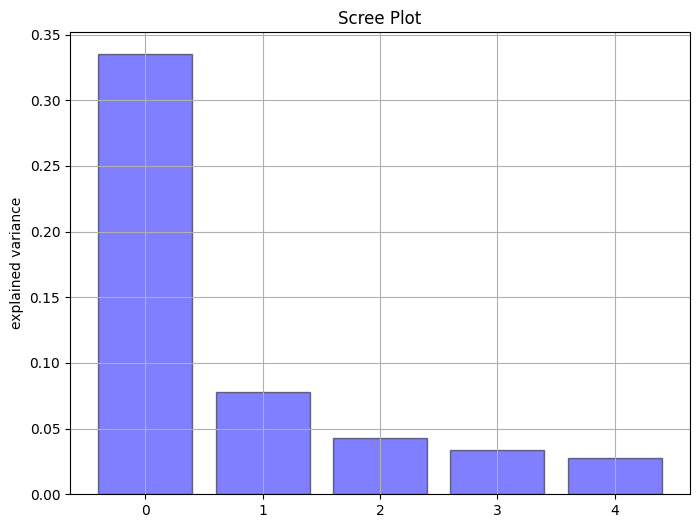

In [29]:
pca_model.plot(5)